# Maximum Likelihood Estimation
---

## Remarks

- It is a method of estimating the parameters of a **statistical model** given observations, by finding the parameter values that **maximize the likelihood** of making given the parameters.
- It is a special case of **Maximum a Posteriori Estimation (MAP)** - unregularized.
- MLE assumes a **uniform prior distribution** of the parameters.
- It is a **point-wise estimation** (not distribution) ans assumes **no prior distribution** (uniform).
- MLE works great for **classification** problems with discrete outcomes, but we have to use different distribution functions, depending on how many classe we have.

**Formula:** $\displaystyle \max_{\beta} \{ \displaystyle \sum_i\ln\{p(y_i|\beta)\} \}$

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.optimize import minimize

%matplotlib inline

In [2]:
def plot_scatter(X, y):
    ax = sns.regplot(X, y)
    ax.set_ylabel("y")
    ax.set_xlabel("x")

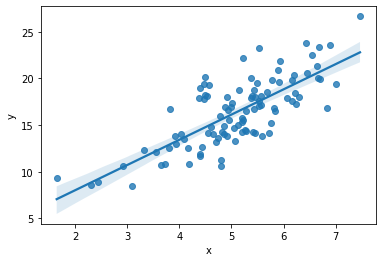

In [12]:
N = 100
X = np.random.normal(loc=5, scale=1, size=N)
y = 3*X + np.random.normal(loc=1, scale=2.5, size=N) # size=N)

plot_scatter(X, y)

**[NOTE]:** Assume a Linear relationship

In [13]:
def mle_regression(params):
    intercept, beta, std = params[0], params[1], params[2]
    yhat = intercept + beta * X
    ll = -np.sum(norm.logpdf(y, loc=yhat, scale=std))
    
    return ll

In [14]:
initial_guess = np.array([3,5,1])
res = minimize(mle_regression, x0=initial_guess, method="Nelder-Mead", options={"disp": True})

res_df = pd.DataFrame({'coef': res['x']})
res_df.index=['constant','x','sigma']   
np.round(res_df.head(2), 4)

Optimization terminated successfully.
         Current function value: 227.883736
         Iterations: 151
         Function evaluations: 271


,coef
constant,2.6010
x,2.7036


### Benchmark MLE

In [6]:
import statsmodels.api as sm

In [15]:
df = pd.DataFrame({'y':y, 'x':X})
df['constant'] = 1

X_df = df[['constant', 'x']]
sm.OLS(y,X_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     138.0
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           2.08e-20
Time:                        13:21:34   Log-Likelihood:                -227.88
No. Observations:                 100   AIC:                             459.8
Df Residuals:                      98   BIC:                             465.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       2.6010      1.195      2.176      0.032       0.229       4.973
x              2.7036      0.230     11.746      0.000       2.247       3.160
==============================================================================
Omnibus:                        3.024   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                3.009
Skew:                           0.385   Prob(JB):                        0.222
Kurtosis:                       2.640   Cond. No.                         26.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

### Poisson

For events with an expected separation $\lambda$ the Poisson distribution $f(x;\lambda)$ describes the probability of $x$ events occuring within the observed interval $\lambda$.


**Formula:** $f(x) = \frac{e^{-\lambda} \lambda^{x}}{x!},\; x = 0,1,2, ...$

**MLE Poisson:** $\hat{\lambda} = \frac{\displaystyle\sum^{n}_{i=1}x_i}{n}$

In [8]:
import random

In [9]:
N = 200
random_lambda = random.choices(range(1,10))[0]
X = np.random.poisson(lam=random_lambda, size=N)

In [10]:
def mle_poisson(X):
    res = X.sum()/N
    return res

poisson_mle_res = mle_poisson(X)

print(f"- Random Lambda: {random_lambda}")
print(f"- MLE Poisson: {poisson_mle_res}")

- Random Lambda: 4
- MLE Poisson: 3.79


---